<a href="https://colab.research.google.com/github/novarizkiyah/novarizkiyah/blob/master/HappinessIndextry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url2015 = 'https://raw.githubusercontent.com/angelo-kevin/tensorflow-intro/master/datasets/world-happiness/2015.csv'
url2016 = 'https://raw.githubusercontent.com/angelo-kevin/tensorflow-intro/master/datasets/world-happiness/2016.csv'
url2017 = 'https://raw.githubusercontent.com/angelo-kevin/tensorflow-intro/master/datasets/world-happiness/2017.csv'
url2018 = 'https://raw.githubusercontent.com/angelo-kevin/tensorflow-intro/master/datasets/world-happiness/2018.csv'
url2019 = 'https://raw.githubusercontent.com/angelo-kevin/tensorflow-intro/master/datasets/world-happiness/2019.csv'


df_2015 = pd.read_csv(url2015)
df_2016 = pd.read_csv(url2016)
df_2017 = pd.read_csv(url2017)
df_2018 = pd.read_csv(url2018)
df_2019 = pd.read_csv(url2019)


In [0]:
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016), sort=False)
df = df.append(prep_frame(df_2017, 2017), sort=False)
df.head()

,,GDP,Family,Life,Freedom,Generosity,Trust,Happiness Score,target,target_n
Country,Year,,,,,,,,,
Switzerland,2015,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,7.587,Top,3
Iceland,2015,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,7.561,Top,3
Denmark,2015,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,7.527,Top,3
Norway,2015,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,7.522,Top,3
Canada,2015,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,7.427,Top,3


In [0]:
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

,GDP,Family,Life,Freedom,Generosity,Trust,Happiness Score
GDP,1.000000,0.584480,0.803493,0.374744,0.006568,0.214877,0.800252
Family,0.584480,1.000000,0.490872,0.454714,0.080144,0.098352,0.627502
Life,0.803493,0.490872,1.000000,0.382680,0.086622,0.175155,0.760712
Freedom,0.374744,0.454714,0.382680,1.000000,0.383047,0.458121,0.554569
Generosity,0.006568,0.080144,0.086622,0.383047,1.000000,0.231411,0.153457
Trust,0.214877,0.098352,0.175155,0.458121,0.231411,1.000000,0.305066
Happiness Score,0.800252,0.627502,0.760712,0.554569,0.153457,0.305066,1.000000


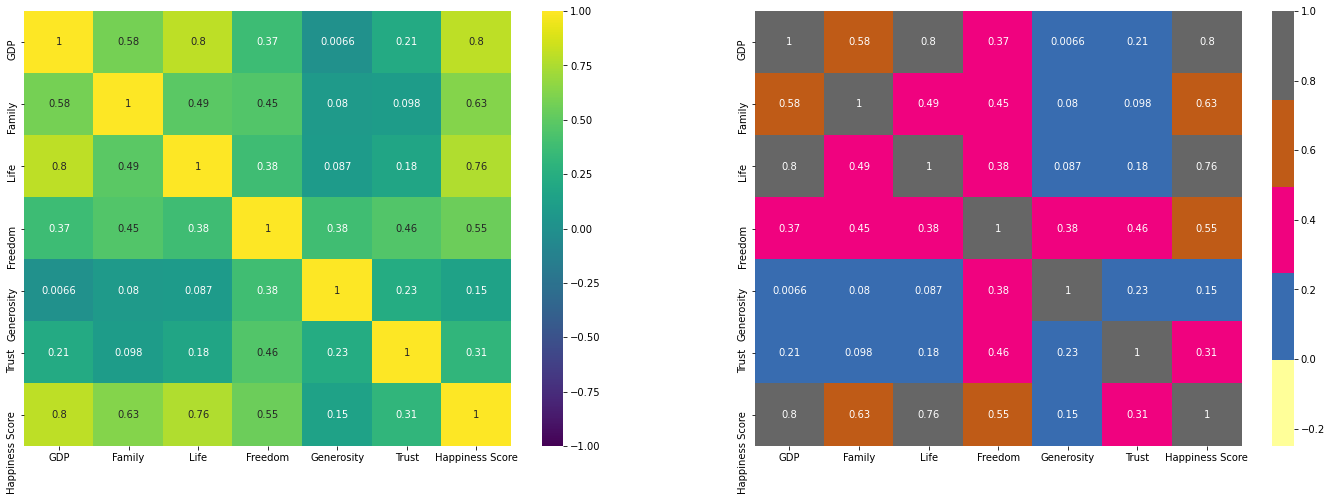

In [0]:
import seaborn as sns
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

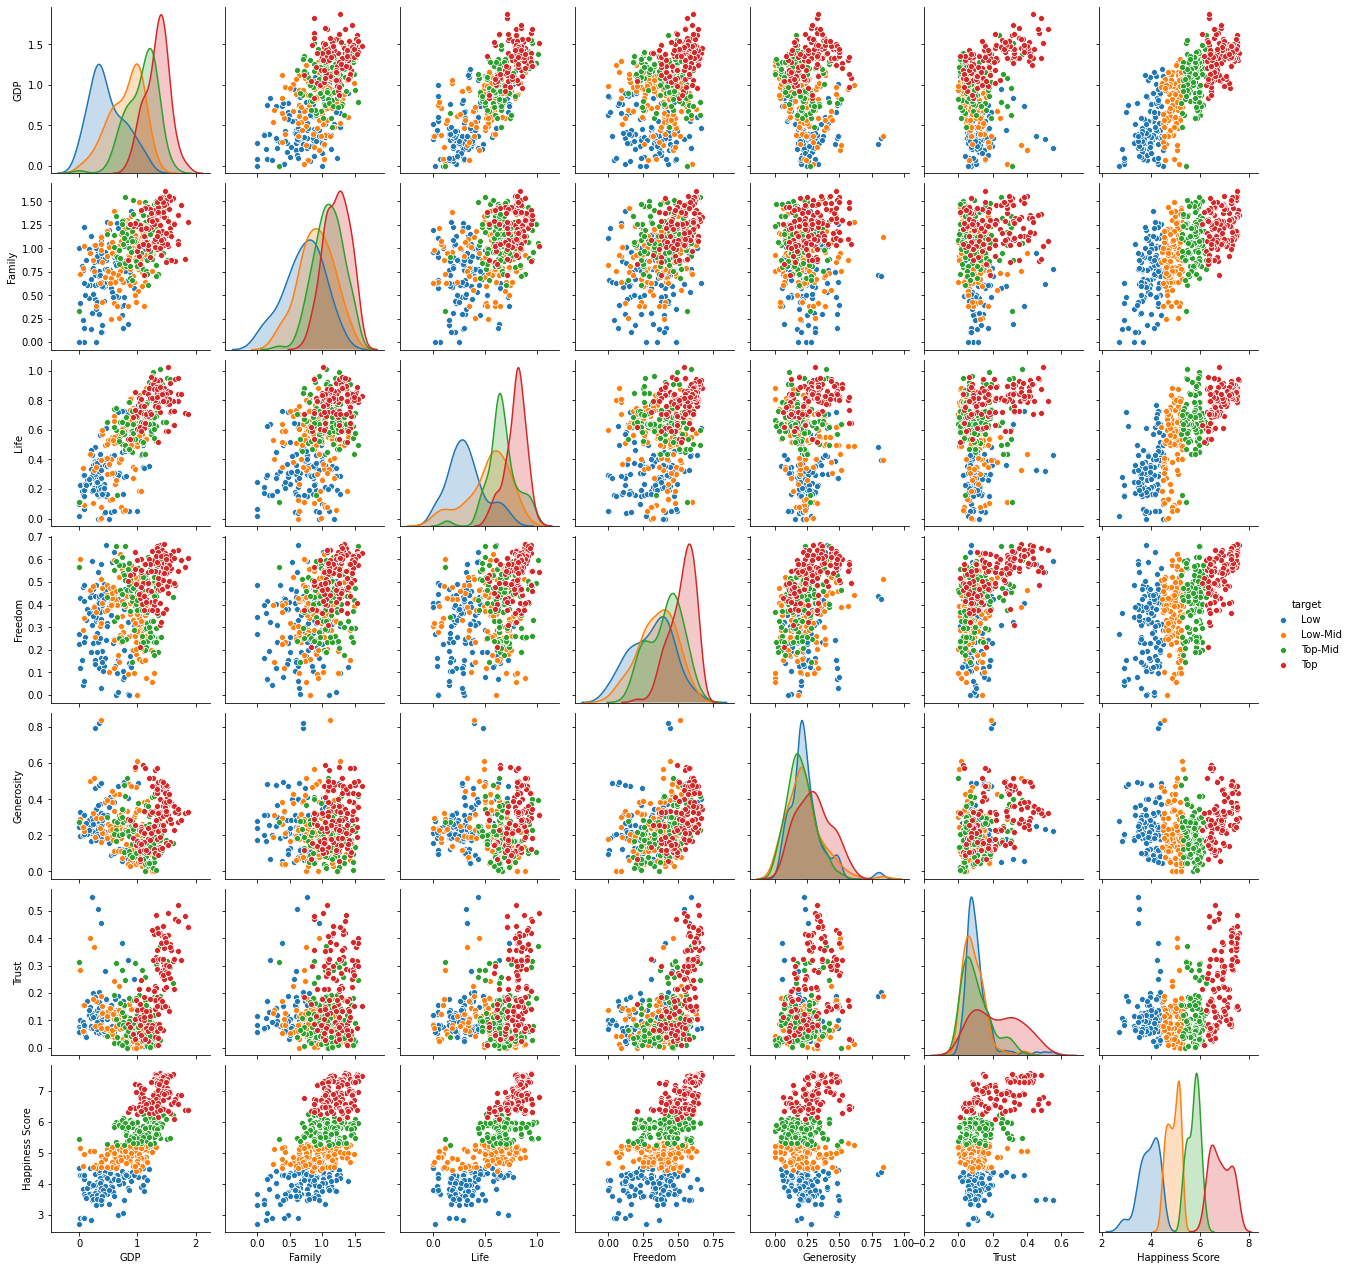

In [0]:
sns.pairplot(df.drop(['target_n'], axis=1), hue='target')
#hvplot.scatter_matrix(df.drop(['target_n'], axis=1), c='target')

#plt.show()

Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: -f


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
classifier_overrides = set()
df_results = discover.discover(df.drop(['target', 'target_n'],axis=1).sample(frac=1), classifier_overrides)

AttributeError: ignored

NameError: ignored

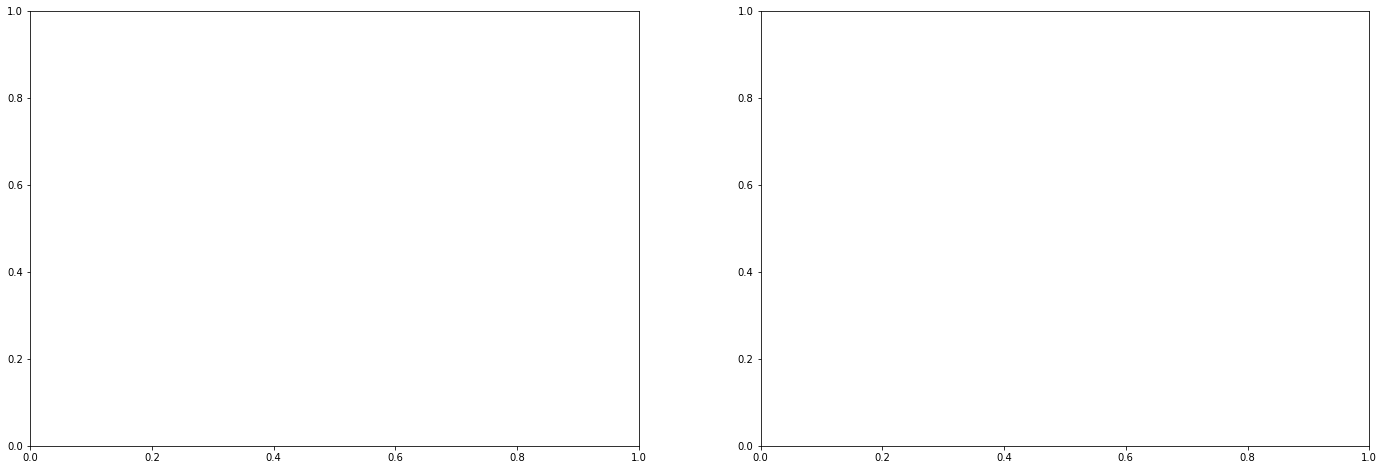

In [0]:
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(df_results.pivot(index='target', columns='feature', values='score').fillna(1).loc[df.drop(['target', 'target_n'],axis=1).columns,df.drop(['target', 'target_n'],axis=1).columns],
            annot=True, center=0, ax=ax[0], vmin=-1, vmax=1, cmap="viridis")
sns.heatmap(df_results.pivot(index='target', columns='feature', values='score').fillna(1).loc[df.drop(['target', 'target_n'],axis=1).columns,df.drop(['target', 'target_n'],axis=1).columns],
            annot=True, center=0, ax=ax[1], vmin=-0.25, vmax=1, cmap="Accent")
plt.plot()